In [1]:
import numpy as N
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from datetime import datetime,timedelta
import pytz as pytz
import sys
import os
import pandas as pd
import xarray as xr
%load_ext autoreload
%matplotlib inline
%autoreload 2

In [107]:
a1 = N.random.randn(10)
a2 = N.random.randn(10)
a3 = N.random.randn(10)
b1 = N.random.randn(10)
b2 = N.random.randn(10)
b3 = N.random.randn(10)
c1 = N.random.randn(10)
c2 = N.random.randn(10)
c3 = N.random.randn(10)
print a1
print b1
print b2

index1 = pd.date_range('20130101',periods=10,name='Time')
index2 = pd.date_range('20121231',periods=10,name='Time')
index3 = pd.date_range('20130102',periods=10,name='Time')
print index1
print index2
print index3

[ 0.00460529  1.55252814 -0.19807317  0.58112953 -0.20119843 -0.18992899
  0.84185796  1.24555209  0.28525311  2.12956098]
[-0.28199902  1.03581596 -0.4793157   0.72781166  1.30054994  0.08685354
 -2.10813374  0.99955457  1.4676966   1.92535427]
[ 1.00985107 -0.40706021 -0.39838776  0.36354446 -0.68696833 -0.83960882
 -1.26478442 -0.81959649 -0.17084533  0.44311105]
DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10'],
              dtype='datetime64[ns]', name=u'Time', freq='D')
DatetimeIndex(['2012-12-31', '2013-01-01', '2013-01-02', '2013-01-03',
               '2013-01-04', '2013-01-05', '2013-01-06', '2013-01-07',
               '2013-01-08', '2013-01-09'],
              dtype='datetime64[ns]', name=u'Time', freq='D')
DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-05',
               '2013-01-06', '2013-01-07', '2013-01-08', '2013-0

In [108]:
data_dict = {'a':a1,'b':b1,'c':c1}
df1 = pd.DataFrame(data_dict,index=index1)
data_dict = {'a':a2,'b':b2,'c':c2}
df2 = pd.DataFrame(data_dict,index=index2)
data_dict = {'a':a3,'b':b3,'c':c3}
df3 = pd.DataFrame(data_dict,index=index3)
print df1
print df2
print df3

                   a         b         c
Time                                    
2013-01-01  0.004605 -0.281999 -1.059917
2013-01-02  1.552528  1.035816 -0.688269
2013-01-03 -0.198073 -0.479316  1.677547
2013-01-04  0.581130  0.727812 -1.183861
2013-01-05 -0.201198  1.300550 -0.640231
2013-01-06 -0.189929  0.086854 -0.982888
2013-01-07  0.841858 -2.108134 -0.119623
2013-01-08  1.245552  0.999555  0.489958
2013-01-09  0.285253  1.467697  0.057385
2013-01-10  2.129561  1.925354  1.343416
                   a         b         c
Time                                    
2012-12-31  0.957370  1.009851 -0.383523
2013-01-01  0.056646 -0.407060 -0.824649
2013-01-02 -1.031571 -0.398388  2.292338
2013-01-03 -0.071622  0.363544  0.015812
2013-01-04 -1.576766 -0.686968  0.560281
2013-01-05 -0.448497 -0.839609  0.544813
2013-01-06 -0.434480 -1.264784  0.196622
2013-01-07 -0.518235 -0.819596 -0.662228
2013-01-08 -1.229168 -0.170845  0.327092
2013-01-09  0.843616  0.443111 -0.907398
                

In [79]:
# Create a pandas panel

df_dict = {'df1':df1,'df2':df2,'df3':df3}
p1 = pd.Panel(df_dict)
print p1
print p1['df1']
print p1['df2']
print p1['df3']

# Now create an xarray DataArray from the panel
da = xr.DataArray(p1)
print da

<class 'pandas.core.panel.Panel'>
Dimensions: 3 (items) x 12 (major_axis) x 3 (minor_axis)
Items axis: df1 to df3
Major_axis axis: 2012-12-31 00:00:00 to 2013-01-11 00:00:00
Minor_axis axis: a to c
                   a         b         c
Time                                    
2012-12-31       NaN       NaN       NaN
2013-01-01 -2.208989 -0.537848 -2.324018
2013-01-02  0.336035 -0.614486 -0.308375
2013-01-03 -0.050132  0.574578 -0.583282
2013-01-04 -1.676523  1.194101 -1.307664
2013-01-05 -0.068823  1.041099 -1.532102
2013-01-06  0.207831  0.735979 -0.327619
2013-01-07 -0.976234 -0.681954  0.199761
2013-01-08  0.163656  0.195036 -0.360829
2013-01-09  0.012094  0.064944 -0.978215
2013-01-10 -0.398442 -1.865480 -2.150744
2013-01-11       NaN       NaN       NaN
                   a         b         c
Time                                    
2012-12-31  0.929142 -0.682827  0.333430
2013-01-01 -0.027020  0.020615 -0.136291
2013-01-02 -0.876342 -0.162444 -0.355927
2013-01-03  2.105353  1

In [80]:
# Create DataArrays from the individual DataFrames
da1 = xr.DataArray(df1)
da2 = xr.DataArray(df2)
da3 = xr.DataArray(df3)
print da1
print da2
print da3

<xarray.DataArray (Time: 10, dim_1: 3)>
array([[-2.208989, -0.537848, -2.324018],
       [ 0.336035, -0.614486, -0.308375],
       [-0.050132,  0.574578, -0.583282],
       [-1.676523,  1.194101, -1.307664],
       [-0.068823,  1.041099, -1.532102],
       [ 0.207831,  0.735979, -0.327619],
       [-0.976234, -0.681954,  0.199761],
       [ 0.163656,  0.195036, -0.360829],
       [ 0.012094,  0.064944, -0.978215],
       [-0.398442, -1.86548 , -2.150744]])
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
  * dim_1    (dim_1) object 'a' 'b' 'c'
<xarray.DataArray (Time: 10, dim_1: 3)>
array([[ 0.929142, -0.682827,  0.33343 ],
       [-0.02702 ,  0.020615, -0.136291],
       [-0.876342, -0.162444, -0.355927],
       [ 2.105353,  1.541374, -0.574799],
       [-0.462359, -0.242869,  1.335052],
       [-1.693184,  1.770873,  0.463834],
       [ 0.508695, -0.750008, -0.848202],
       [ 0.944692,  0.208777, -0.718028],
       [ 1.061049, -0.410111, -0.89798

In [81]:
#da1a,da2a,da3a = xr.align(da1,da2,da3,join='inner',exclude='dim_1')
da_list = [da1,da2,da3]
da_dict = {'da1':da1,'da2':da2,'da3':da3}
#print da_dict.values()
da1a,da2a,da3a = xr.align(*da_dict.values(),join='inner',exclude='dim_1')

In [82]:
print da1a
print da2a
print da3a

<xarray.DataArray (Time: 8, dim_1: 3)>
array([[ 0.336035, -0.614486, -0.308375],
       [-0.050132,  0.574578, -0.583282],
       [-1.676523,  1.194101, -1.307664],
       [-0.068823,  1.041099, -1.532102],
       [ 0.207831,  0.735979, -0.327619],
       [-0.976234, -0.681954,  0.199761],
       [ 0.163656,  0.195036, -0.360829],
       [ 0.012094,  0.064944, -0.978215]])
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
  * dim_1    (dim_1) object 'a' 'b' 'c'
<xarray.DataArray (Time: 8, dim_1: 3)>
array([[-0.876342, -0.162444, -0.355927],
       [ 2.105353,  1.541374, -0.574799],
       [-0.462359, -0.242869,  1.335052],
       [-1.693184,  1.770873,  0.463834],
       [ 0.508695, -0.750008, -0.848202],
       [ 0.944692,  0.208777, -0.718028],
       [ 1.061049, -0.410111, -0.897986],
       [ 0.237153,  0.587051, -0.267825]])
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
  * dim_1    (dim_1) object 'a' 'b' 'c

In [83]:
da_combined = xr.concat([da1a,da2a,da3a],'Instrument')

In [84]:
print da_combined

<xarray.DataArray (Instrument: 3, Time: 8, dim_1: 3)>
array([[[  3.360350e-01,  -6.144865e-01,  -3.083749e-01],
        [ -5.013162e-02,   5.745776e-01,  -5.832816e-01],
        [ -1.676523e+00,   1.194101e+00,  -1.307664e+00],
        [ -6.882307e-02,   1.041099e+00,  -1.532102e+00],
        [  2.078310e-01,   7.359794e-01,  -3.276190e-01],
        [ -9.762342e-01,  -6.819543e-01,   1.997609e-01],
        [  1.636563e-01,   1.950361e-01,  -3.608290e-01],
        [  1.209406e-02,   6.494406e-02,  -9.782149e-01]],

       [[ -8.763425e-01,  -1.624442e-01,  -3.559267e-01],
        [  2.105353e+00,   1.541374e+00,  -5.747986e-01],
        [ -4.623593e-01,  -2.428694e-01,   1.335052e+00],
        [ -1.693184e+00,   1.770873e+00,   4.638340e-01],
        [  5.086954e-01,  -7.500079e-01,  -8.482016e-01],
        [  9.446920e-01,   2.087771e-01,  -7.180281e-01],
        [  1.061049e+00,  -4.101107e-01,  -8.979860e-01],
        [  2.371527e-01,   5.870512e-01,  -2.678250e-01]],

       [[  6.5

In [85]:
# Create DataSets from the individual DataFrames
ds1 = xr.Dataset(df1)
ds2 = xr.Dataset(df2)
ds3 = xr.Dataset(df3)
print ds1
print ds2
print ds3

<xarray.Dataset>
Dimensions:  (Time: 10)
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-01 2013-01-02 2013-01-03 ...
Data variables:
    a        (Time) float64 -2.209 0.336 -0.05013 -1.677 -0.06882 0.2078 ...
    b        (Time) float64 -0.5378 -0.6145 0.5746 1.194 1.041 0.736 -0.682 ...
    c        (Time) float64 -2.324 -0.3084 -0.5833 -1.308 -1.532 -0.3276 ...
<xarray.Dataset>
Dimensions:  (Time: 10)
Coordinates:
  * Time     (Time) datetime64[ns] 2012-12-31 2013-01-01 2013-01-02 ...
Data variables:
    a        (Time) float64 0.9291 -0.02702 -0.8763 2.105 -0.4624 -1.693 ...
    b        (Time) float64 -0.6828 0.02061 -0.1624 1.541 -0.2429 1.771 ...
    c        (Time) float64 0.3334 -0.1363 -0.3559 -0.5748 1.335 0.4638 ...
<xarray.Dataset>
Dimensions:  (Time: 10)
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
Data variables:
    a        (Time) float64 0.652 -0.3859 1.535 -1.592 1.363 0.4912 ...
    b        (Time) float64 -0.9706 0.9

In [86]:
ds_list = [ds1,ds2,ds3]
ds1a,ds2a,ds3a = xr.align(*ds_list,join='inner')

In [87]:
print ds1a
print ds2a
print ds3a

<xarray.Dataset>
Dimensions:  (Time: 8)
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
Data variables:
    a        (Time) float64 0.336 -0.05013 -1.677 -0.06882 0.2078 -0.9762 ...
    b        (Time) float64 -0.6145 0.5746 1.194 1.041 0.736 -0.682 0.195 ...
    c        (Time) float64 -0.3084 -0.5833 -1.308 -1.532 -0.3276 0.1998 ...
<xarray.Dataset>
Dimensions:  (Time: 8)
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
Data variables:
    a        (Time) float64 -0.8763 2.105 -0.4624 -1.693 0.5087 0.9447 1.061 ...
    b        (Time) float64 -0.1624 1.541 -0.2429 1.771 -0.75 0.2088 -0.4101 ...
    c        (Time) float64 -0.3559 -0.5748 1.335 0.4638 -0.8482 -0.718 ...
<xarray.Dataset>
Dimensions:  (Time: 8)
Coordinates:
  * Time     (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
Data variables:
    a        (Time) float64 0.652 -0.3859 1.535 -1.592 1.363 0.4912 ...
    b        (Time) float64 -0.970

TypeError: unsupported operand type(s) for -: 'str' and 'str'

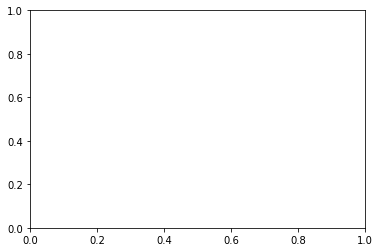

In [119]:
ds_combined = xr.concat([ds1a,ds2a,ds3a],pd.Index(['I1','I2','I3'],name='Instrument'))
#ds_combined['d']=('Instrument',N.array(['I1','I2','I3']))
#ds_combined = ds_combined.set_index(Instrument='d')
#ds_combined.set_index(Instrument='d',inplace=True)
#ds_combined['a'].plot()
ds_combined['a'].plot()

In [105]:
print ds_combined

<xarray.Dataset>
Dimensions:     (Instrument: 3, Time: 8)
Coordinates:
  * Time        (Time) datetime64[ns] 2013-01-02 2013-01-03 2013-01-04 ...
  * Instrument  (Instrument) int64 1 2 3
Data variables:
    a           (Instrument, Time) float64 0.336 -0.05013 -1.677 -0.06882 ...
    b           (Instrument, Time) float64 -0.6145 0.5746 1.194 1.041 0.736 ...
    c           (Instrument, Time) float64 -0.3084 -0.5833 -1.308 -1.532 ...
    d           (Instrument) |S2 'I1' 'I2' 'I3'
